Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Anamarija Hauptman"
COLLABORATORS = ""

---

# Domača naloga 1: Upravljanje in prikazovanje slik
1. Napišite funkcijo za nalaganje slik v standardnih formatih (bmp, jpg, png, tif, gif, idr.) s knjižnico `PIL.Image`:
```python
    def loadImage(iPath):
        return oImage
```
kjer je `iPath` pot do slike (mapa in ime datoteke). Funkcija naj vrne sliko v obliki `numpy.ndarray` polja v spremenljivki `oImage`. Naložite in prikažite sliko `slika.jpg`.

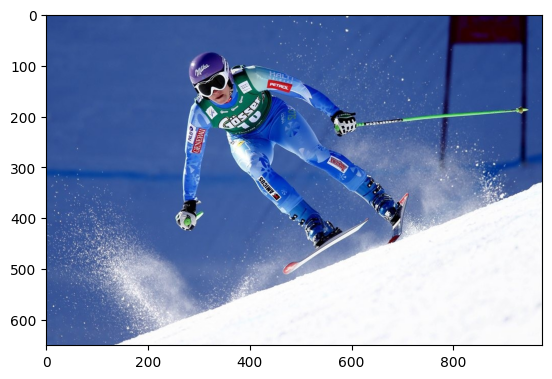

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
def loadImage(iPath):
    # Your code here
    oImage = Image.open(iPath)
    oImage = np.array(oImage)
    return oImage
def showImage(iImage, iTitle='', cmap='viridis'):
    plt.figure()
    plt.imshow(iImage, cmap=cmap)
    plt.title(iTitle)
    plt.show()
img = loadImage('./data/slika.jpg')
showImage(img)

In [3]:
from nose.tools import assert_equal
# Run 'loadImage' function
lv_image = loadImage("./data/lindsey.jpg")
# Test return value is of correct type
assert(isinstance(lv_image, np.ndarray))
# Test dimensions of the return image are correct
assert_equal(lv_image.shape, (450, 800, 3))
# Test pixel values at position 100, 100 are correct
assert_equal(np.sum(lv_image[100, 100] - np.array([224, 233, 250])), 0)

2. Napišite funkcijo za shranjevanje slik v standardnih formatih (bmp, jpg, png, tif, gif, idr.) s knjižnico `PIL.Image`:
```python
def saveImage(iPath, iImage, iFormat):
```
kjer je `iPath` pot do slike (mapa in ime datoteke), spremenljivka `iImage` slika v obliki `numpy.ndarray` polja, `iFormat`	pa beseda z željeno obliko zapisa slika (npr. `bmp`, `png`).

In [4]:
def saveImage(iPath, iImage, iFormat):
    # Your code here
    iImage = iImage.flatten()
    iImage.tofile(iPath)

In [5]:
import os
fpath = "./data/testing_saveImage.png"
saveImage(fpath, lv_image, "png")
# Check there is file on disk with correct name
assert(os.path.isfile(fpath))

3. Iz barvne 2D slike `slika.jpg` izluščite pravokotno barvno podsliko med oglišči $(x_1,y_1)= (260,70)$ in $(x_2,y_2)=(390,180)$ in jo prikažite. Izrezana slika naj bo v spremenljivki imenovani `podslika`. Preverite pravilnost določanja področja s pomočjo spodnje slike:

![Izrezana slika](RV_1_PovecanaSlika.png)

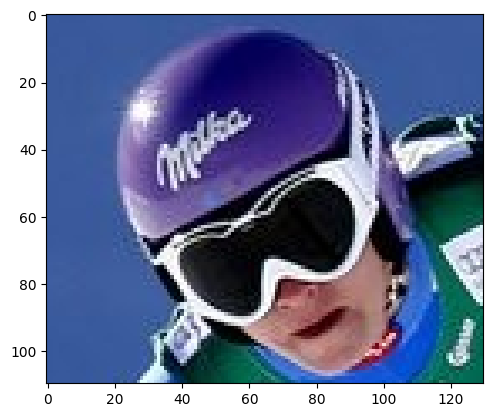

In [6]:
# Izrezana slika naj bo v spremenljivki podslika
# Your code here
img = loadImage('./data/slika.jpg')
podslika = img[70:180, 260:390]
showImage(podslika)

In [7]:
# Test if image has correct dimensions
assert_equal(podslika.shape, (110, 130, 3))
# Test pixel values
assert_equal(podslika[0, 0, 0], 57)
assert_equal(podslika[0, 0, 1], 88)
assert_equal(podslika[0, 0, 2], 155)

4. S pomočjo indeksiranja prezrcalite sliko `slika.jpg` preko navpične osi in jo prikažite. Prezrcaljeno sliko shranite pod spremenljivko z imenom `zrcalna`.

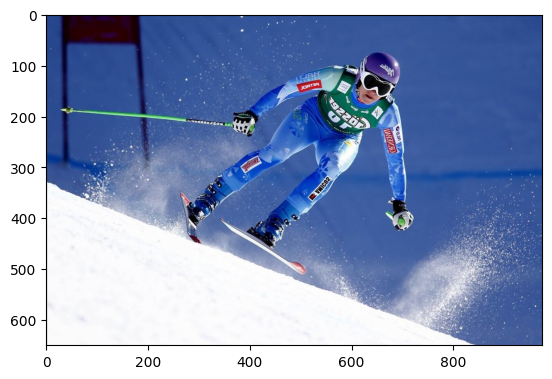

In [8]:
# Your code here
img = loadImage('./data/slika.jpg')
zrcalna = np.zeros_like(img, dtype=np.uint8)
for y in range(len(zrcalna)):
    for x in range(len(zrcalna[y])):
        zrcalna[y, x] = img[y, -x+1]
showImage(zrcalna)

In [9]:
# Your code here

5. Uporabite funkcijo `numpy.transpose` za rotacijo slike za 90 stopinj, tako da transponirate $x$ in $y$ os slike `slika.jpg`. Dobljena slika naj bo shranjena pod spremenljivko `transponirana`.

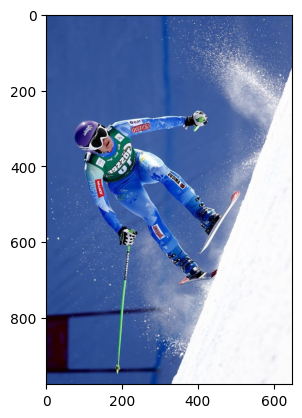

In [10]:
# Your code here
img = loadImage('./data/slika.jpg')
transponirana = np.transpose(img, (1, 0, 2))
showImage(transponirana)

In [11]:
# Compare array pixel values
slika = loadImage("./data/slika.jpg")
assert_equal(slika[400, 5, 2], transponirana[5, 400, 2])

6. Pretvorite barvno sliko $C = [R,\, G,\, B]$ v sivinsko sliko $S$ preko enačbe $S = \tfrac{1}{3}R + \tfrac{1}{3}G + \tfrac{1}{3}B$ in narišite projekciji maksimalne in povprečne svetlosti v smeri $x$ in $y$ koordinat 2D slik. Projekciji lahko ustvarite z uporabo `for` zanke ali funkcij `numpy.max()` in `numpy.mean()`, pri čemer ustrezno nastavite parameter `axis`. Za izris projekcij uporabite funkcijo `plot()` v knjižnici `matplotlib.pyplot`. Projekcije shranite v spremenljivke: `x_proj_max`, `y_proj_max`, `x_proj_mean` in `y_proj_mean`.
	

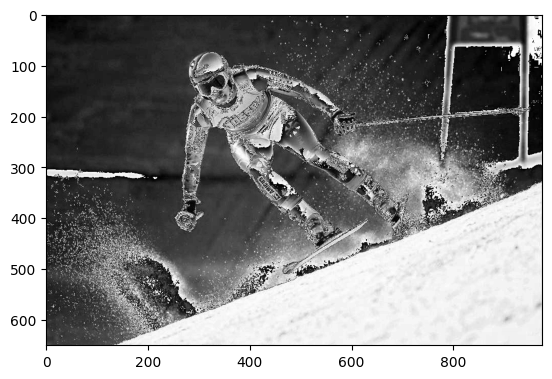

In [12]:
# Your code here
img = loadImage('./data/slika.jpg')
sivinska = np.zeros((img.shape[0], img.shape[1]))
sivinska[:, :] = (img[:, :, 0] + img[:, :, 1] + img[:, :, 2]) / 3
showImage(sivinska, cmap='gray')
xDim = sivinska.shape[1]
yDim = sivinska.shape[0]
x_proj_max = np.max(sivinska, axis=1)
x_proj_mean = np.mean(sivinska, axis=1)
y_proj_max = np.max(sivinska, axis=0)
y_proj_mean = np.mean(sivinska, axis=0)


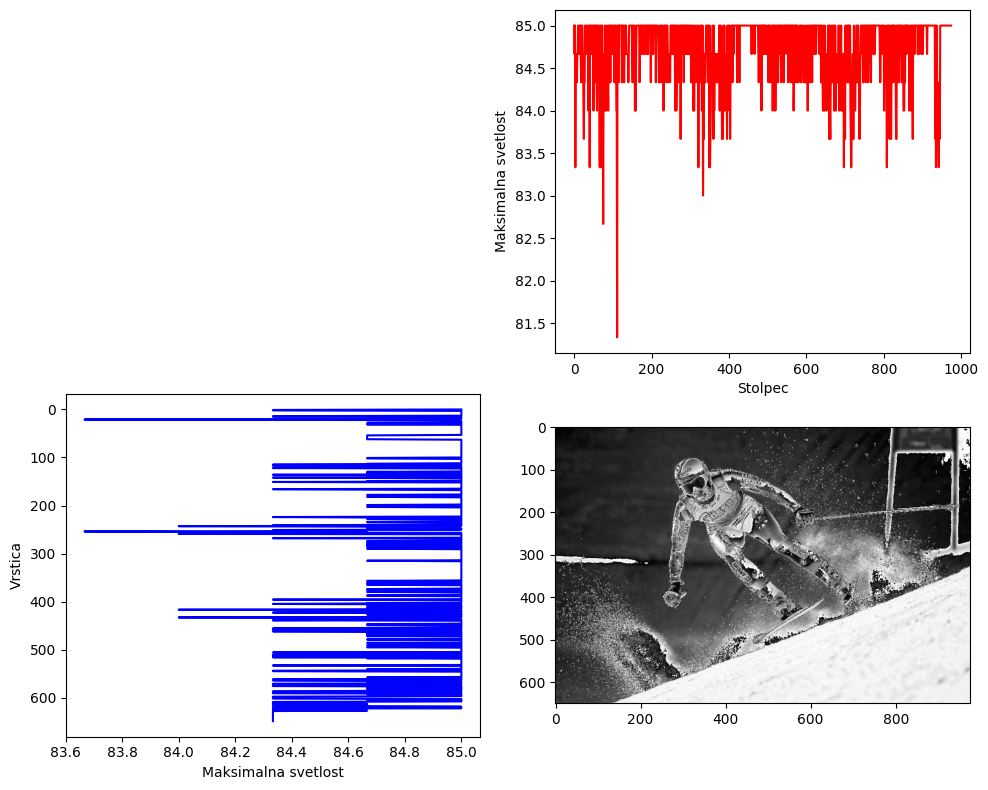

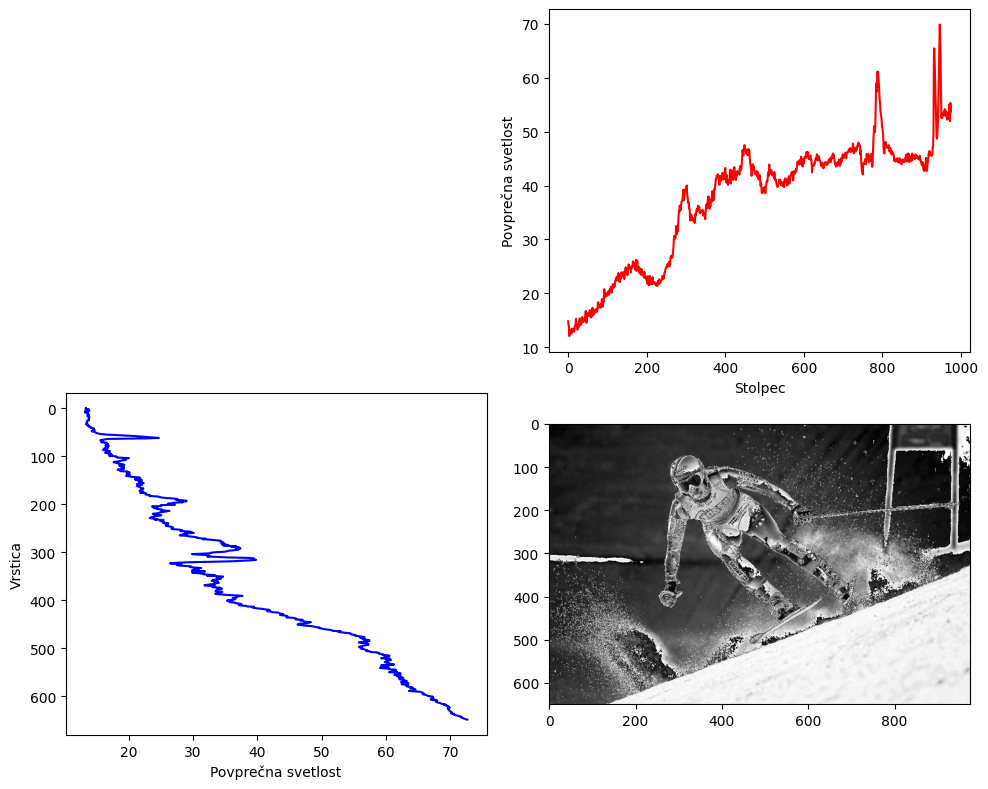

In [13]:
# Your code here
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[1, 1].imshow(sivinska, cmap='gray')
axs[1, 0].plot(x_proj_max, range(yDim), color='b')
axs[1, 0].invert_yaxis()
axs[1, 0].set_xlabel('Maksimalna svetlost')
axs[1, 0].set_ylabel('Vrstica')
axs[0, 1].plot(range(xDim), y_proj_max, color='r')
axs[0, 1].set_xlabel('Stolpec')
axs[0, 1].set_ylabel('Maksimalna svetlost')
fig.delaxes(axs[0, 0])
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[1, 1].imshow(sivinska, cmap='gray')
axs[1, 0].plot(x_proj_mean, range(yDim), color='b')
axs[1, 0].invert_yaxis()
axs[1, 0].set_xlabel('Povprečna svetlost')
axs[1, 0].set_ylabel('Vrstica')
axs[0, 1].plot(range(xDim), y_proj_mean, color='r')
axs[0, 1].set_xlabel('Stolpec')
axs[0, 1].set_ylabel('Povprečna svetlost')
fig.delaxes(axs[0, 0])
plt.tight_layout()
plt.show()

In [14]:
# Test dimensions of variables
assert_equal(x_proj_max.size, 650)
assert_equal(y_proj_max.size, 975)
assert_equal(x_proj_mean.size, 650)
assert_equal(y_proj_mean.size, 975)

7. Zamenjajte vrednosti slikovnih elementov rdečega kanala 2D barvne slike, ki imajo vrednost med 160 in 200 z vrednostjo 255. Uporabite funkcijo `where()` v knjižnici `numpy`. Prikažite originalno in novo barvno sliko.

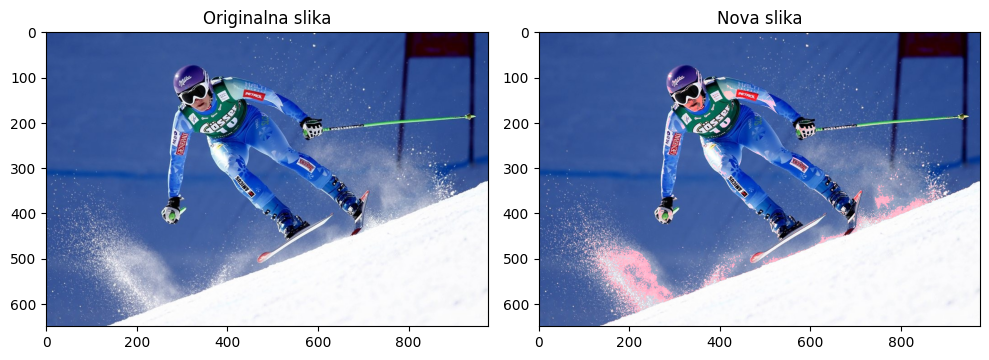

In [15]:
# Your code here
img = loadImage('./data/slika.jpg')
img_new = np.copy(img)
idx = np.where((img_new[:, :, 0] > 160) & (img_new[:, :, 0] < 200))
img_new[idx[0], idx[1], 0] = 255

fig, axs = plt.subplots(1, 2, figsize=(10, 8))
axs[0].set_title('Originalna slika')
axs[0].imshow(img)
axs[1].set_title('Nova slika')
axs[1].imshow(img_new)
plt.tight_layout()
plt.show()

In [16]:
# Your code here